# Repaso

In [1]:
def debug(fn):
    def wrap(*args, **kwargs):
        print ('Argumentos entrada:', *args)
        print('Return: ', fn(*args, **kwargs))
        return fn(*args, **kwargs)
    return wrap

In [2]:
@debug
def suma(a,b, c, d,e):
    return a+b+c+d+e

In [3]:
a=suma(3,6, 3, 4, 6)
a

Argumentos entrada: 3 6 3 4 6
Return:  22


22

In [4]:
for i in range(0, 20, 2):
    print (i)

0
2
4
6
8
10
12
14
16
18


In [5]:
i

18

In [6]:
lst=[i for i in range(0, 20, 2)]
lst

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

# Multiprocessing

In [7]:
import multiprocessing as mp

In [8]:
def square(x):
    return x*x

In [9]:
data=[i for i in range(10000)]

In [10]:
%time
seq=[square(x) for x in data]
seq[:10]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [11]:
%time
pool=mp.Pool()
result=pool.map(square, data)
result[:10]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [12]:
import numpy as np

In [13]:
mp.cpu_count()

12

In [14]:
array=np.random.randint(0, 10, size=[200, 5000])
data=array.tolist()
#data[:1]

In [15]:
def rango(row, minimo, maximo):
    cuenta=0
    for e in row:
        if minimo<=e<=maximo:
            cuenta+=1
    
    return cuenta

In [16]:
%time res=[rango(e, 4, 8) for e in data]
res[:10]

CPU times: user 80.6 ms, sys: 1.76 ms, total: 82.4 ms
Wall time: 81.4 ms


[2547, 2533, 2561, 2528, 2461, 2480, 2490, 2524, 2439, 2561]

In [17]:
pool=mp.Pool(mp.cpu_count())
%time res=pool.starmap(rango, [(e, 4, 8) for e in data])
pool.close()
res[:10]

CPU times: user 35.6 ms, sys: 3.8 ms, total: 39.4 ms
Wall time: 42 ms


[2547, 2533, 2561, 2528, 2461, 2480, 2490, 2524, 2439, 2561]

In [18]:
# multi async

def rango2(i, row, minimo, maximo):
    cuenta=0
    
    for e in row:
         if minimo<=e<=maximo:
            cuenta+=1
    
    return i,cuenta

In [19]:
res=[]
def colecta(result):
    global res
    res.append(result)
    

In [20]:
pool=mp.Pool(6)
for i,e in enumerate(data):
    pool.apply_async(rango2, args=(i,e,4,8), callback=colecta)

pool.close()
pool.join()

res.sort(key=lambda x: x[0])

final_res=[e for e in res]
final_res[:10]

[(0, 2547),
 (1, 2533),
 (2, 2561),
 (3, 2528),
 (4, 2461),
 (5, 2480),
 (6, 2490),
 (7, 2524),
 (8, 2439),
 (9, 2561)]

In [22]:
pool=mp.Pool(6)
res_obj=[pool.apply_async(rango2, args=(i,e,4,8)) for i,e in enumerate(data)]

res=[c.get()[1] for c in res_obj]

pool.close()
pool.join()
                          
res[:10]

[2547, 2533, 2561, 2528, 2461, 2480, 2490, 2524, 2439, 2561]

In [23]:
pool=mp.Pool(6)
res=pool.starmap_async(rango2, [(i, e, 4, 8) for i,e in enumerate(data)]).get()
pool.close()
res[:10]

[(0, 2547),
 (1, 2533),
 (2, 2561),
 (3, 2528),
 (4, 2461),
 (5, 2480),
 (6, 2490),
 (7, 2524),
 (8, 2439),
 (9, 2561)]

In [24]:
# con pandas

import pandas as pd


In [25]:
df=pd.DataFrame(np.random.randint(3, 10, size=[5,2]))
df.head()

,0,1
0,7,9
1,9,3
2,4,7
3,4,8
4,8,9


In [42]:
def hipo(c):
    return (c[1]**2+c[2]**2)**.5

In [43]:
with mp.Pool(6) as pool:
    res=pool.imap(hipo, df.itertuples(name=None), chunksize=10)
    out=[round(e, 2) for e in res]
out

[11.4, 9.49, 8.06, 8.94, 12.04]

In [44]:
hipo([0,7,9])

11.40175425099138

In [45]:
# pathos

from pathos.multiprocessing import ProcessingPool as Pool

In [46]:
df=pd.DataFrame(np.random.randint(3, 10, size=[500,2]))
df.head()

,0,1
0,8,4
1,6,9
2,6,8
3,7,5
4,9,5


In [47]:
def fun(df):
    return df.shape

In [48]:
cores=mp.cpu_count()

df_split=np.array_split(df, cores, axis=0)

pool=Pool(cores)

%time

df_out=pd.DataFrame(np.vstack(pool.map(fun, df_split)))

pool.close()
pool.join()
pool.clear()


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 12.2 µs


In [49]:
df_out.head()

,0,1
0,42,2
1,42,2
2,42,2
3,42,2
4,42,2


In [54]:
type(df_split)

list

# Dask

In [56]:
#!pip3 install "dask[complete]"

In [58]:
#!pip3 install dask_ml

In [59]:
import os
import dask
import dask.dataframe as dd

In [60]:
archivos=os.path.join('data', 'accounts.*.csv')
archivos

'data/accounts.*.csv'

In [62]:
df=dd.read_csv(archivos)
df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [63]:
df=dd.read_csv(os.path.join('data', 'nycflights', '*.csv'), 
               parse_dates={'Date':[0,1,2]})
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [64]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [65]:
df.columns

Index(['Date', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [66]:
df=dd.read_csv(os.path.join('data', 'nycflights', '*.csv'), 
               parse_dates={'Date':[0,1,2]}, 
               dtype={'TailNum':str, 'CRSElapsedTime':float,
                      'Cancelled':bool})
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [67]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [68]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, Date to Diverted
dtypes: datetime64[ns](1), object(4), bool(1), float64(10), int64(5)
memory usage: 401.0 MB


In [69]:
df.shape

(Delayed('int-3a5ce1a2-a3fd-4785-b6a1-ea94f57e8561'), 21)

In [71]:
df.DepDelay.max().compute()

1435.0

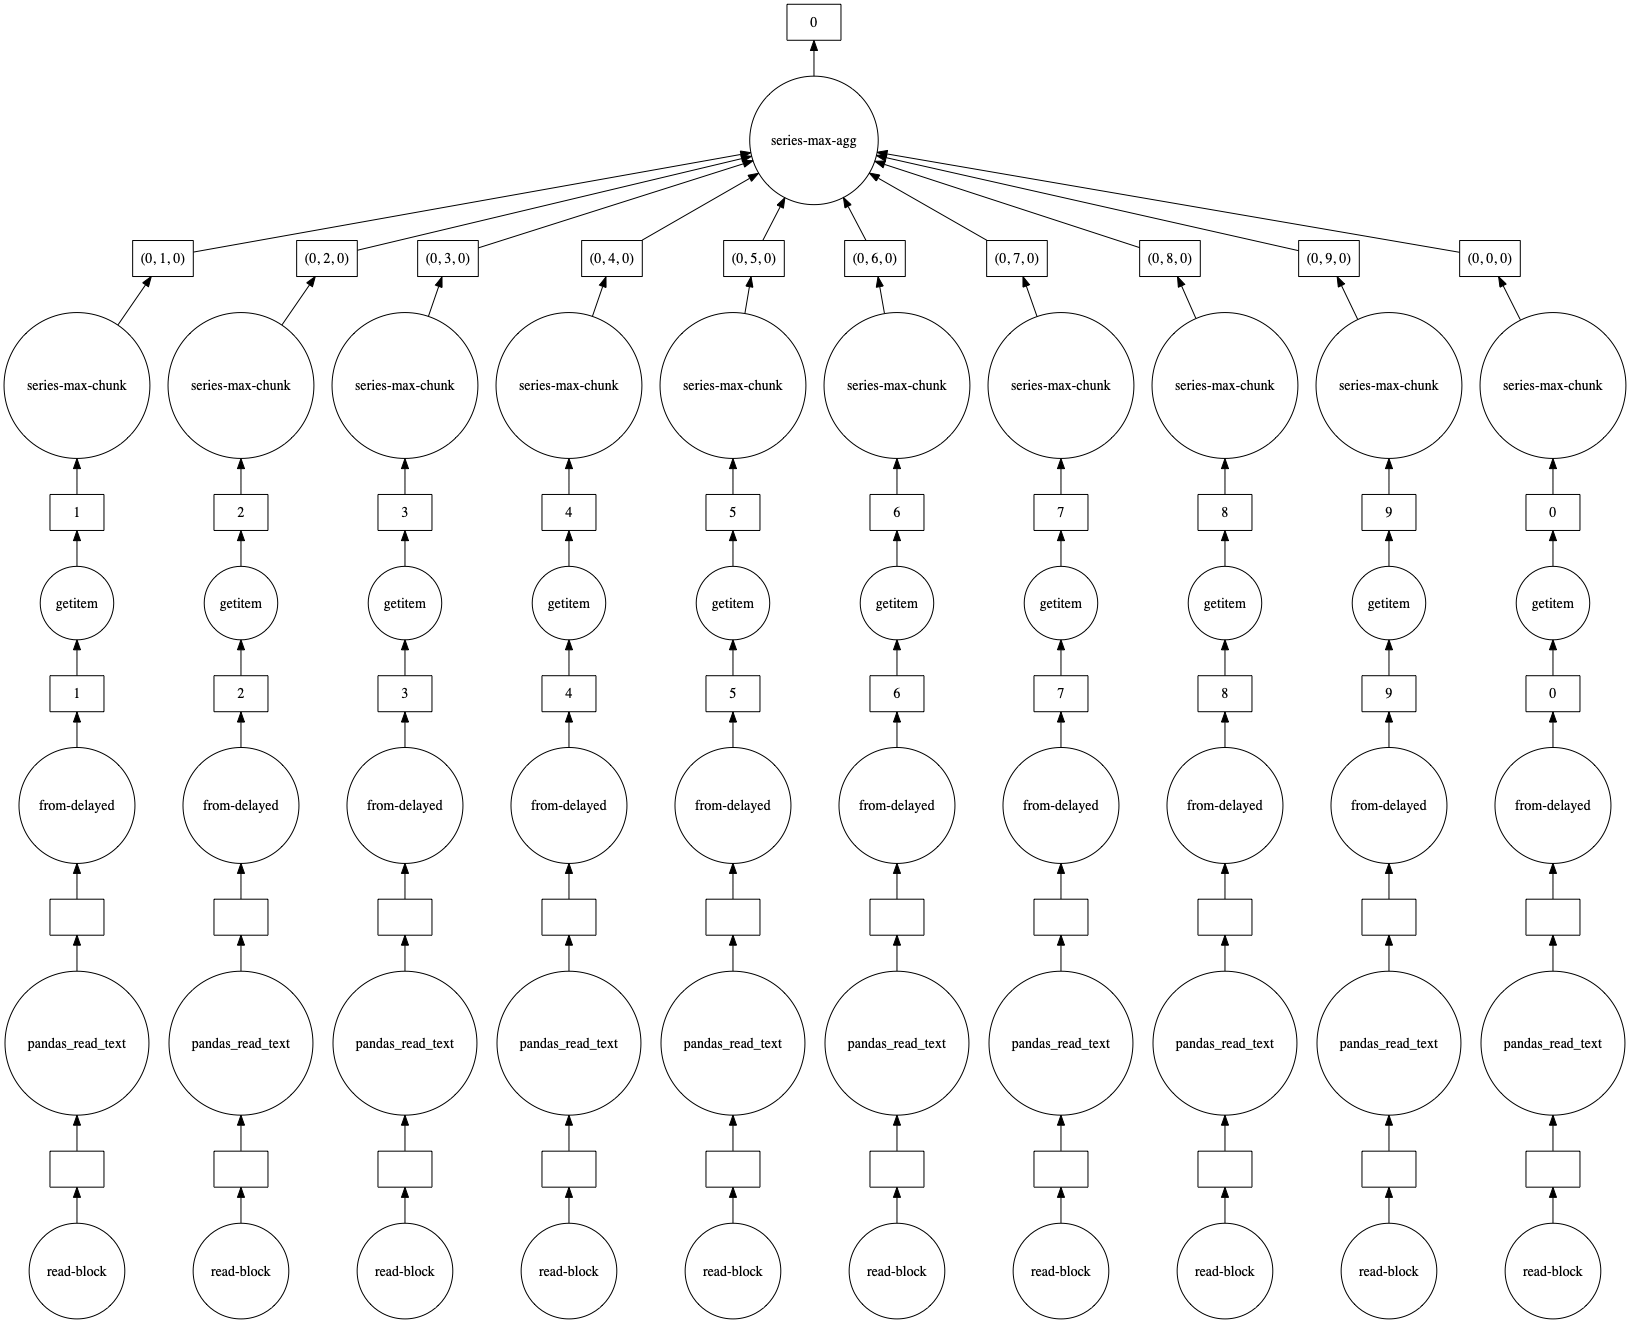

In [72]:
df.DepDelay.max().visualize()

In [73]:
len(df)

2611892

In [74]:
# no cancelado
len(df[~df.Cancelled])

2540961

In [75]:
df[~df.Cancelled].groupby('Origin').Origin.count().compute()

Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Origin, dtype: int64

In [76]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [77]:
df.groupby('DayOfWeek').DepDelay.mean().compute()

DayOfWeek
1     8.096565
2     8.149109
3     9.141912
4    10.538275
5    11.476687
6     7.824071
7     8.994296
Name: DepDelay, dtype: float64

In [78]:
no_cancelado=df[~df.Cancelled]

media_delay=no_cancelado.DepDelay.mean()
std_delay=no_cancelado.DepDelay.std()

media_delay

dd.Scalar<series-..., dtype=float64>

In [79]:
%time media_delay_res=media_delay.compute()

CPU times: user 9.78 s, sys: 2.31 s, total: 12.1 s
Wall time: 4.53 s


In [80]:
media_delay_res

9.206602541321965

In [81]:
%time std_delay_res=std_delay.compute()
std_delay_res

CPU times: user 9.88 s, sys: 2.3 s, total: 12.2 s
Wall time: 4.62 s


28.974539774551456

In [83]:
%time media_delay_res, std_delay_res=dask.compute(media_delay, std_delay)

CPU times: user 9.82 s, sys: 2.32 s, total: 12.1 s
Wall time: 4.53 s


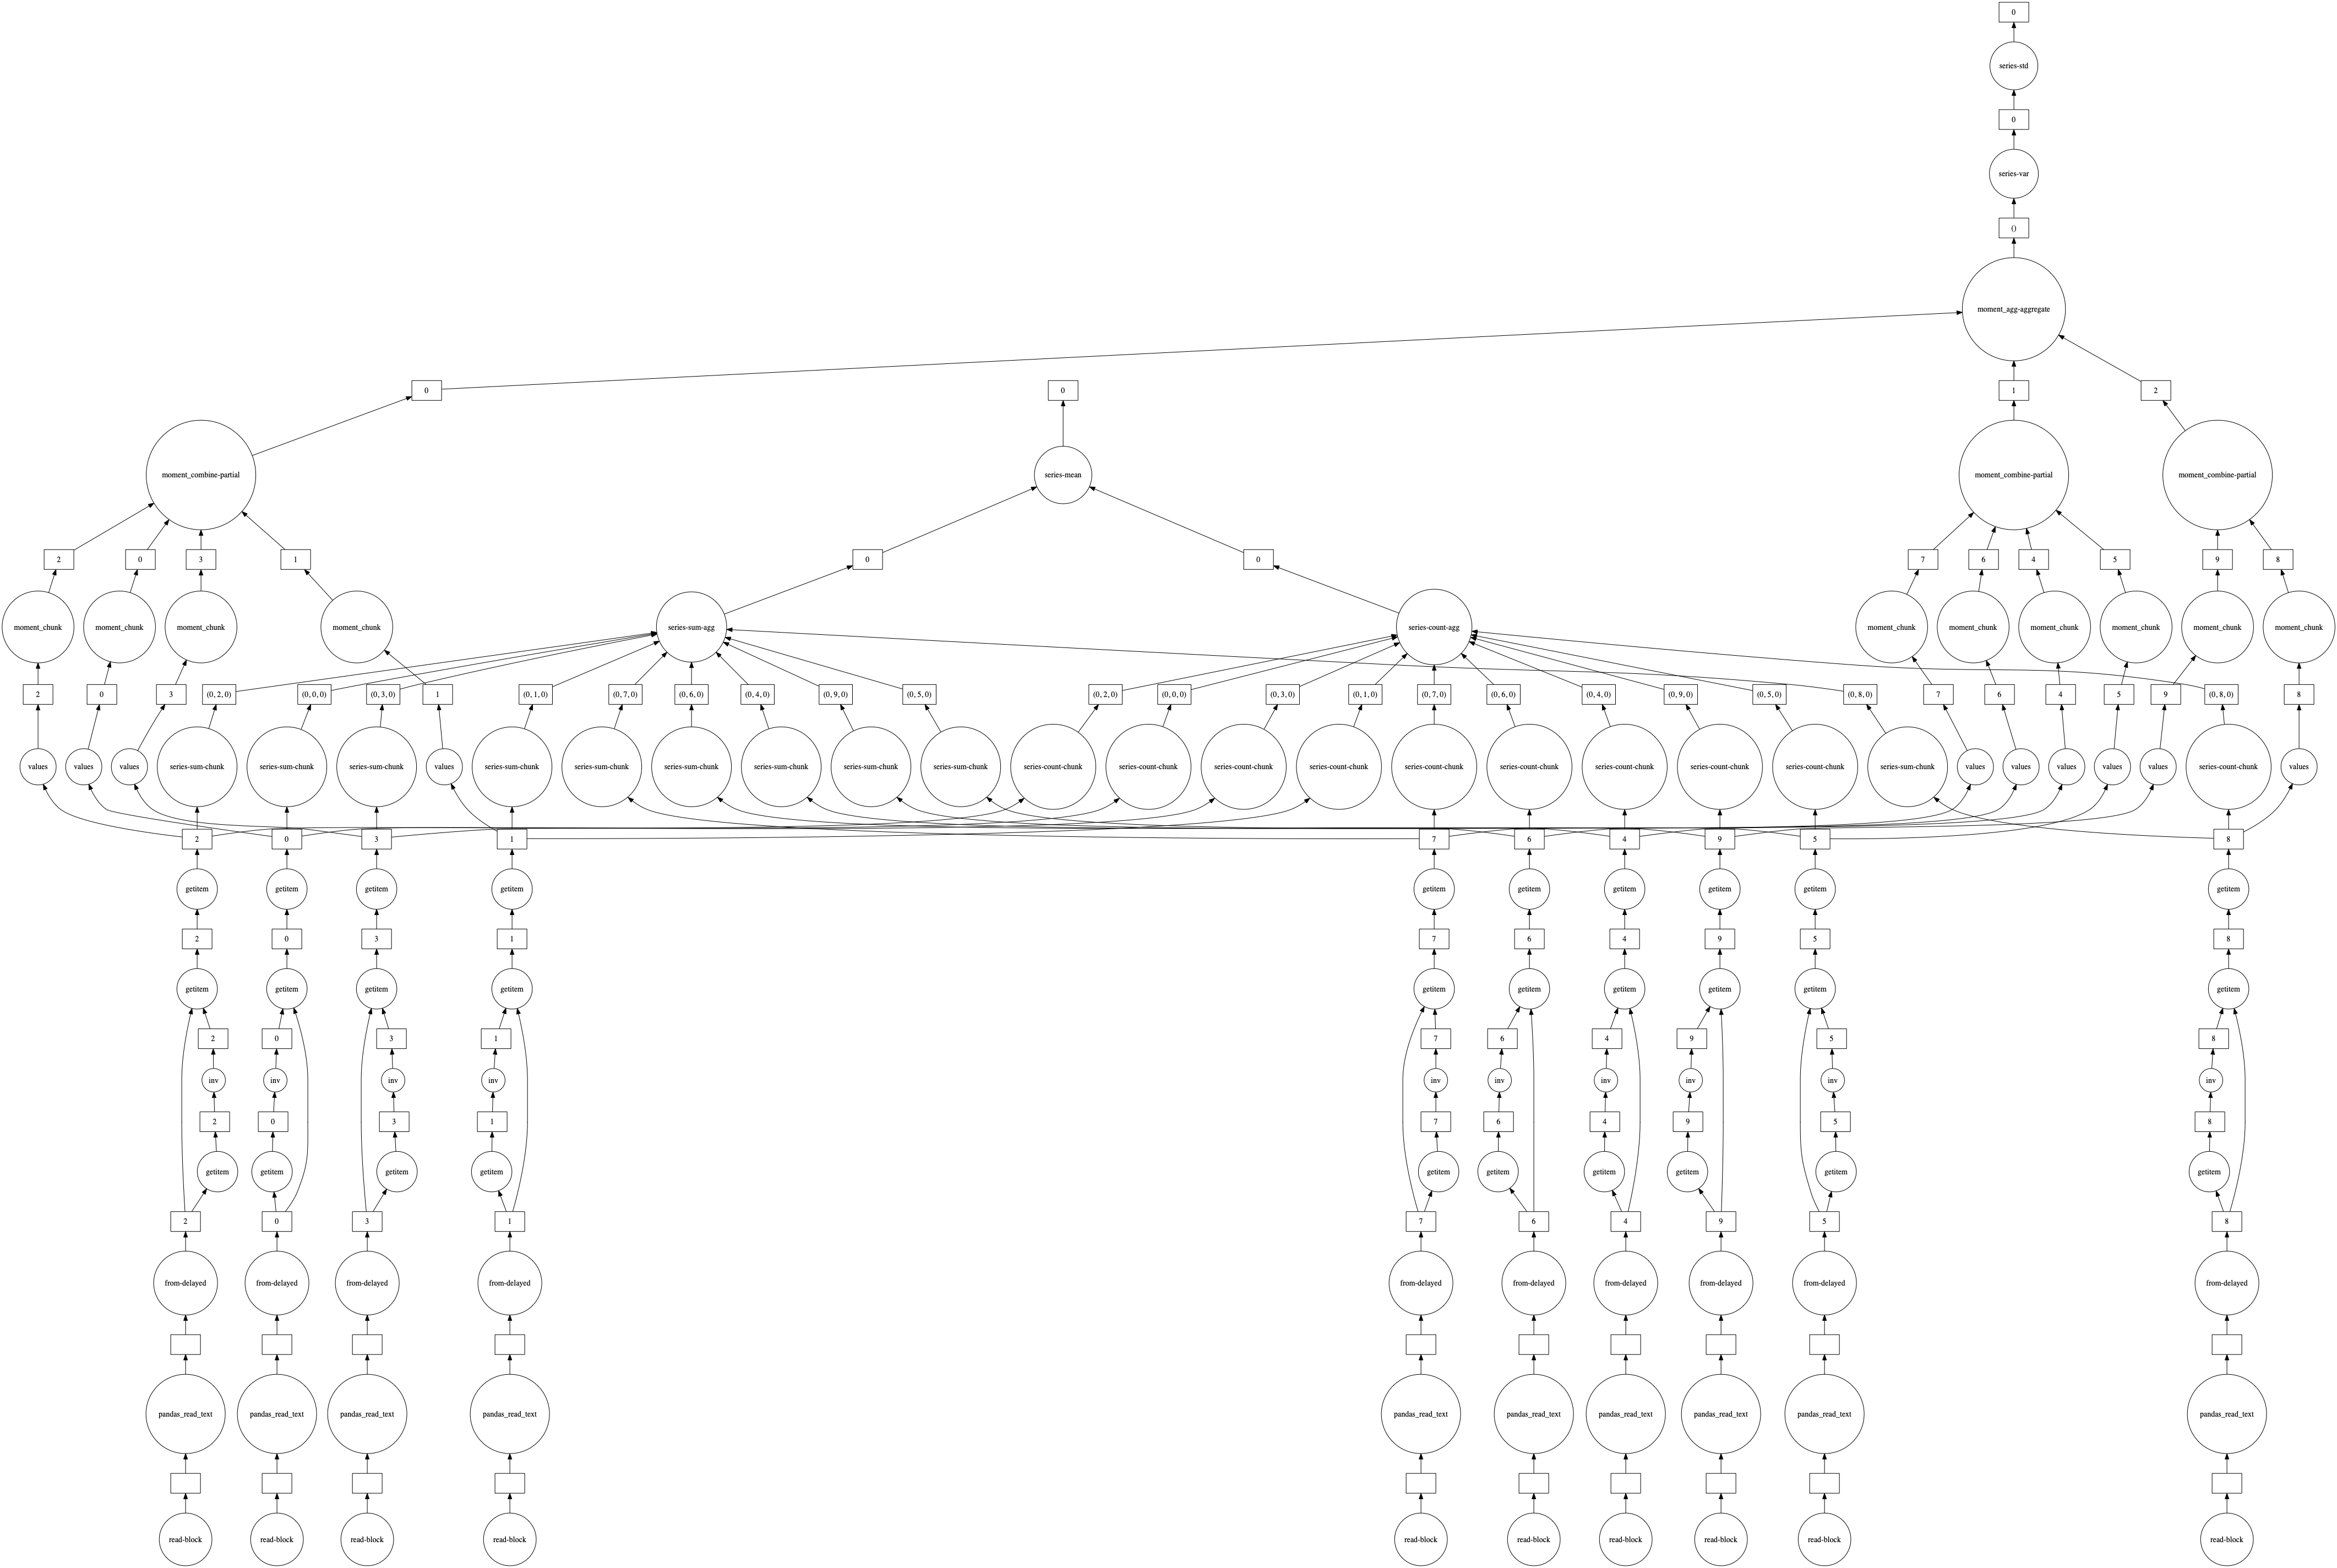

In [84]:
dask.visualize(media_delay, std_delay)

In [89]:
# hdfs

%time df_csv=dd.read_csv(archivos)
df_csv.head()

CPU times: user 17.8 ms, sys: 10.7 ms, total: 28.4 ms
Wall time: 28 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [86]:
target=os.path.join('data', 'accounts.h5')
target

'data/accounts.h5'

In [87]:
%time df_csv.to_hdf(target, '/data')

CPU times: user 3.69 s, sys: 546 ms, total: 4.24 s
Wall time: 4.45 s


['data/accounts.h5', 'data/accounts.h5', 'data/accounts.h5']

In [90]:
%time df_hdf=dd.read_hdf(target, '/data')
df_hdf.head()

CPU times: user 22.4 ms, sys: 2.74 ms, total: 25.1 ms
Wall time: 23.6 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [91]:
%time df_csv.amount.sum().compute()

CPU times: user 766 ms, sys: 265 ms, total: 1.03 s
Wall time: 514 ms


3101435607

In [92]:
%time df_hdf.amount.sum().compute()

CPU times: user 2.35 s, sys: 232 ms, total: 2.58 s
Wall time: 2.58 s


3101435607

In [94]:
df_hdf.categorize(columns=['names']).to_hdf(target, '/data2')

['data/accounts.h5', 'data/accounts.h5', 'data/accounts.h5']

In [96]:
df_hdf=dd.read_hdf(target, '/data2')
df_hdf.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [97]:
%time df_hdf.amount.sum().compute()

CPU times: user 198 ms, sys: 84.3 ms, total: 282 ms
Wall time: 278 ms


3101435607

In [99]:
df_hdf.dtypes

id           int64
names     category
amount       int64
dtype: object

In [100]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [101]:
df_hdf.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: category(1), int64(2)
memory usage: 71.5 MB


In [103]:
# parquet

#!pip3 install fastparquet

In [104]:
target=os.path.join('data', 'accounts.parquet')

df_csv.categorize(coloumns=['names']).to_parquet(target, 
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

In [105]:
df_p=dd.read_parquet(target)
df_p.head()

,id,names,amount
index,,,
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [106]:
%time df_p.amount.sum().compute()

CPU times: user 120 ms, sys: 57.7 ms, total: 177 ms
Wall time: 95.4 ms


3101435607

## tqdm

In [107]:
!pip3 install tqdm

In [108]:
import time
from tqdm import tqdm

In [111]:
for i in tqdm(range(2), desc='Primer loop'):
    tqdm._instances.clear()
    for j in tqdm(range(5), desc='Segundo loop'):
        time.sleep(0.5)

Primer loop: 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]
